<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1:  After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e., the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only one in 10,000 people. What are the chances that you actually have the disease? (Show your calculations as well as giving the final result.)**
    

Bayes Theorem helps us calculate the probability of a hypothesis being true, if the evidence is present. This is also known as conditional probability.

Here we want to determine the probability of you having the disease given that you have tested positive i.e. **P(H | E)**.


**P(H)** = Probability that the hypothesis holds, also known as belief. In this case, it is the probability of having the disease, which is 1 in 10,000 = **0.0001**.

**P(E | H)** = Probability we would see the evidence given the hypothesis is true. In this case, probability of of testing positive given that you have the disease, which is 99% = **0.99**.

To calculate **P(H | E)**, we also need :
- **P($\neg$H)** = probability of hypothesis not being true, which in this case is probability of not having the disease i.e. **1 - P(H) = 1 - 0.0001 = 0.9999**

- **P(E | $\neg$H)** = probability we would see the evidence given the hypothesis is not true, which is probability of testing positive given that you don't have the disease i.e. since the test is 99% accurate, there is a 1% chance of a false positive = **0.01**

With this information, we can calculate **P(H | E)**.


$$ P(H | E) = {P(H) * P(E | H) \over P(E)} $$ or
$$ P(H | E) = {P(H) * P(E | H) \over P(H) * P(E | H) + P(\neg H) * P(E | \neg H)} $$

$$ P(H | E) = {0.0001 * 0.99 \over 0.0001 * 0.99 + 0.9999 * 0.01} $$

$$ P(H | E) = {0.000099 \over 0.000099 + 0.009999} $$

$$ P(H | E) = {0.000099 \over 0.010098} $$

$$ P(H | E) = 0.009803 \approx 0.0098 = 0.98\% $$

### So the probability that you have the disease given a the test result is positive is approximately **0.98%**



<br>


<br>


**Q2: Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively. This problem can be posed as a binary classification problem to predict the label of the No-Show class. Labels = {Yes, No}. The data is available through Kaggle. The following set of variables are available for model creation: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.**

 **Data Website: https://www.kaggle.com/joniarroba/noshowappointmentsLinks to an external site.**

**The goal of this exercise is to do data exploration, model building and evaluation. Create the following models (you do not need to implement these models, almost all major ML libraries have built in models): (i) Logistic Regression (ii) Decision Tree (iii) Random Forest**

**Use cross validation (you can use built in libraries for these also).**


 - **For data exploration, show the distribution of the variables, missing values (if any) and relationship between the predictors and the target variable (33 points)**
- **Build the prediction model and use 10-fold cross validation (17 points)**
- **Report the following metrics for your models: Precision, Recall, F-Score, AUC, Plot the ROC curve (20 points)**

## Data Exploration

In [12]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#loading data for exploration
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#keeping a copy original data for comparison and rollback
og_data = pd.read_csv('KaggleV2-May-2016.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset contains 110527 rows and 14 columns, associated with medical appointments of patients focused on whether the patient showed up or not

In [15]:
#check if any columns have null values
df.isna().sum().sort_values(ascending=False)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [16]:
#check if any rows are duplicated in the dataset
df.duplicated().sum()

0

There are no Null values in any of the columns or duplicate rows in the dataset, indicating the quality of data is good based on the initial checks. Let's delve deep into the data to check for specific anomalies

In [17]:
#get quantitative summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Describe doesn't tell us much for any characteristic except for ***Age*** which tells us the mean age and distribution of age of patients and also points out that point out min age is -1, which might be erronous data entry. Also ***Handcap*** is a boolean with possible values of 0 or 1, but the column has a max value of 4.


In [18]:
#investigating Age for erronous data entry
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

There seems to be only one entry where ***Age=-1***

In [19]:
#locating incorrect row
df.loc[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [20]:
#calculate mena age of the dataset
mean_age = df.Age.mean()
#replace invalid age with mean age of the dataset
df.loc[df.Age == -1, 'Age'] = mean_age

This row can either be discarded or the age can be corrected to be replaced by the mean age of patients, which is what is being done in this case

In [21]:
#check if invalid row still exists
df.loc[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<Axes: xlabel='Age'>

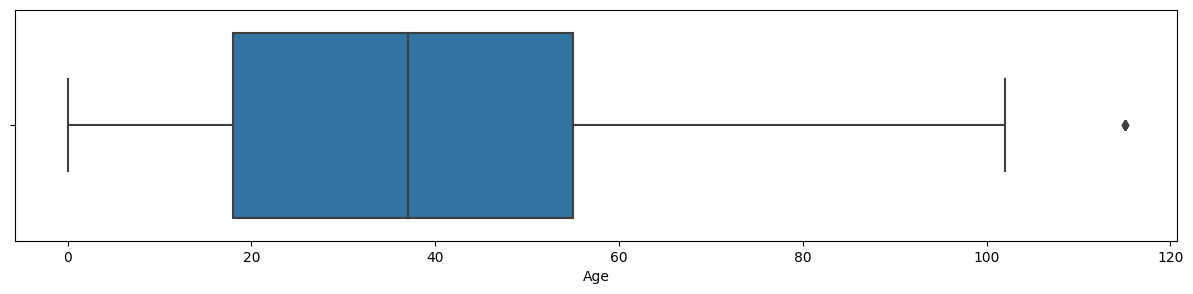

In [22]:
#plot the distribution of age in the dataset
plt.figure(figsize=(15 ,3))
sb.boxplot(x=df.Age)

The distribution graph shows that age is pretty evenly distributed with older people being on the lower end with the majority of patients lying in the age range of >20 and <60. Ages over 100 look like outliers, will be revisited later if they affect accuracy of the model

In [23]:
#investigating Age for erronous data entry
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [24]:
# sample values where Handcap is > 1
df.loc[df.Handcap.isin([2,3,4])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94.0,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11.0,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44.0,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64.0,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34.0,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39.0,PRAIA DO SUÁ,1,0,0,0,2,1,No


There are 199 entries where the ***Handcap*** value is outside the bounds of what is described in the data i.e. not a boolean value(0 or 1). Since values > 1 could also mean multiple values, we can standardize these values to 1 as they could represent truthy values.

In [25]:
#replace Handcap values 2,3 and 4 with 1
df.loc[df.Handcap.isin([2,3,4]),'Handcap'] = 1

In [26]:
#check if values have been successfully replaced
df.Handcap.value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

Values for Handicap have been corrected

The dataset contains columns for the date of appointment and when the appointment was scheduled, which in itself are not important attributes for classification, but a new feature using these columns can be derived, which is days patient has to wait for an appointment. We can check if more waiting leads to more No-shows, or if there exists some other correlation

Before we create a new column we need to standardize and validate the existing data

In [27]:
#standardize date format
df['ScheduledDate'] = df.ScheduledDay.apply(lambda x: pd.to_datetime(x))
df['AppointmentDate'] = df.AppointmentDay.apply(lambda x: pd.to_datetime(x))
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00


In [28]:
#calculate waiting period from scheduled date to appointment date
df['waiting_period'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1


In [29]:
#check for invalid values
df['waiting_period'].value_counts()

-1      38563
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 81         1
 126        1
 125        1
 150        1
 122        1
Name: waiting_period, Length: 131, dtype: int64

The number of invalid rows i.e. waiting period = -1 is very high, from the limited amount of data sampled above it seems like the timestamp entered in the system for appointment date is erronous. We need to check if disregarding the timestamp gives better results as ~30% of the data cannot be discarded.

In [30]:
#stabdardize datetime formate removing time
df['ScheduledDate'] = df.ScheduledDay.apply(lambda x: pd.to_datetime(x.split("T")[0]))
df['AppointmentDate'] = df.AppointmentDay.apply(lambda x: pd.to_datetime(x.split("T")[0]))
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,-1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,-1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,-1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,-1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,-1


In [31]:
#calculate waiting period from scheduled date to appointment date
df['waiting_period'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [32]:
#check if there are still invalid dates
df.loc[df.waiting_period < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38.0,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10,2016-05-09,-1
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19.0,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18,2016-05-17,-1
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22.0,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-04,-1
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81.0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11,2016-05-05,-6
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7.0,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-03,-1


After discarding timestamp, there are 5 rows where Appointment Date is before Scheduled Date - these will be discarded

In [33]:
dfbp = df

In [34]:
#filter out entries with invalid dates
df.drop(df[df.waiting_period < 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110522 non-null  float64       
 1   AppointmentID    110522 non-null  int64         
 2   Gender           110522 non-null  object        
 3   ScheduledDay     110522 non-null  object        
 4   AppointmentDay   110522 non-null  object        
 5   Age              110522 non-null  float64       
 6   Neighbourhood    110522 non-null  object        
 7   Scholarship      110522 non-null  int64         
 8   Hipertension     110522 non-null  int64         
 9   Diabetes         110522 non-null  int64         
 10  Alcoholism       110522 non-null  int64         
 11  Handcap          110522 non-null  int64         
 12  SMS_received     110522 non-null  int64         
 13  No-show          110522 non-null  object        
 14  ScheduledDate    110

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
#check if only valid entries exist
df.loc[df.waiting_period < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period


In [37]:
df = df.reset_index(drop=True)

In [38]:
df.loc[27033, :]

PatientId             117691856291529.0
AppointmentID                   5742075
Gender                                M
ScheduledDay       2016-05-30T07:41:51Z
AppointmentDay     2016-05-30T00:00:00Z
Age                                 7.0
Neighbourhood             SÃO CRISTÓVÃO
Scholarship                           0
Hipertension                          0
Diabetes                              0
Alcoholism                            0
Handcap                               0
SMS_received                          0
No-show                              No
ScheduledDate       2016-05-30 00:00:00
AppointmentDate     2016-05-30 00:00:00
waiting_period                        0
Name: 27033, dtype: object

No invalid rows where appointment date < scheduled date exist in the dataset

We can check the gender split in the data and if it affects the % of No-shows. Based on just value counts, the dataset contains **64% female and 36% male patients**

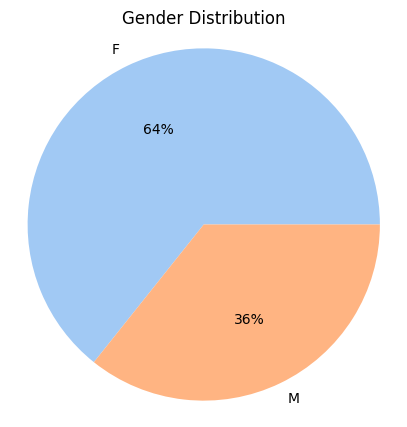

In [39]:


gender_counts = df.groupby('Gender')['PatientId'].nunique()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [40]:
df.loc[df.Gender =='F']['No-show'].value_counts()

No     57246
Yes    14591
Name: No-show, dtype: int64

Out of the 71,837 female patient records, 14,591 appointments are no-shows i.e. **~20.31%**.

In [41]:
df.loc[df.Gender =='M']['No-show'].value_counts()

No     30962
Yes     7723
Name: No-show, dtype: int64

Out of the 38,685 male patient records, 7,723 appointments are no-shows i.e. **~19.96%**.

#### Hence the % of no shows across gender is relatively the same.

<Axes: xlabel='Gender', ylabel='percent'>

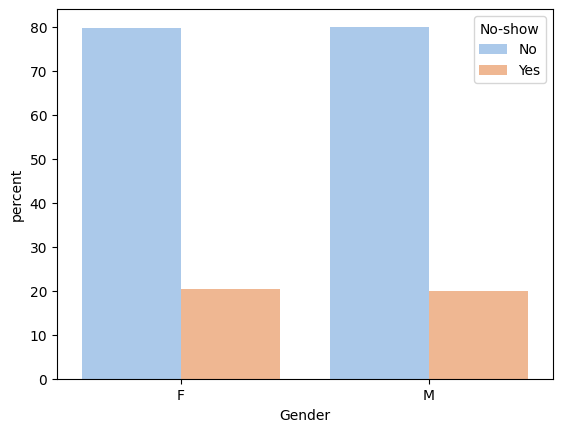

In [42]:
x,y = 'Gender', 'No-show'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Representing the same information visually just confirms the above numbers

Plotting no-shows by neighbourhoods doesn't provide any useful insight as there is no way to directly co-relate the neighbourhood by distance or any other metric to the hospital which would contribute to a higher or lower rate of no-shows.

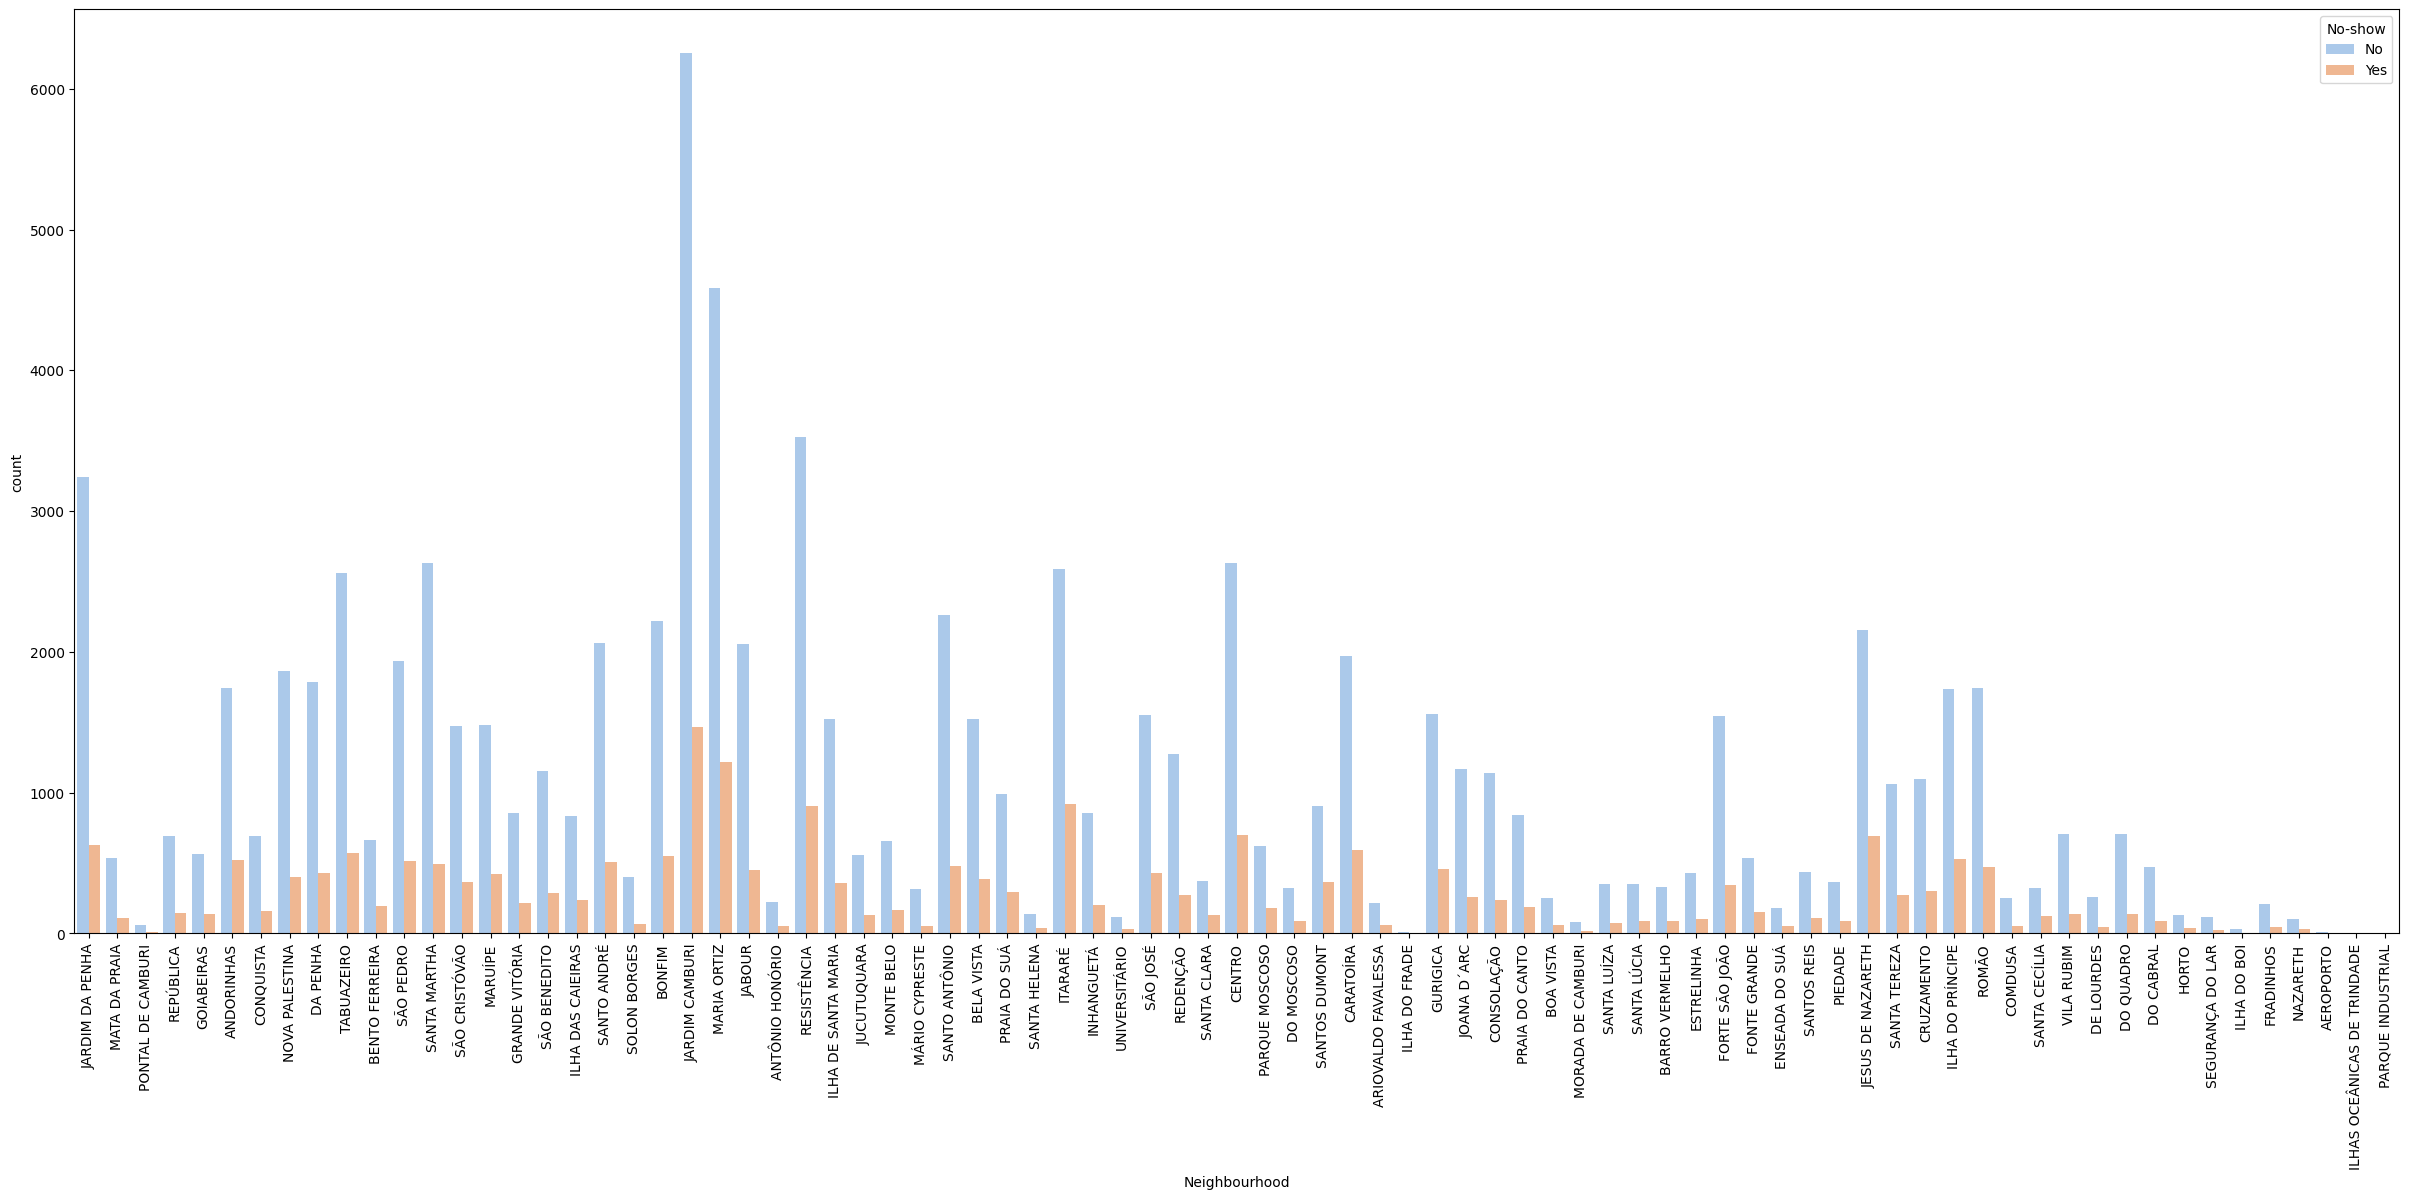

In [43]:
#plot no of no-shows against neighbourhoods
plt.figure(figsize=(30,12))
fig = sb.countplot(x='Neighbourhood',hue='No-show',data=df, palette=sb.color_palette("pastel"))
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

Schloarship which represents if a patient is covered under the Bolsa Familia welfare scheme can also be checked to see if it has an effect of the % of no-shows.

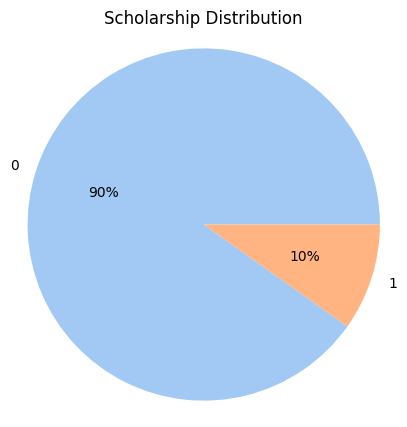

In [44]:
#get no. of appointments covered under the scheme
sch_counts = df.Scholarship.value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sch_counts, labels=sch_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
plt.title('Scholarship Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Based on the above only **10%** of the total appointments were covered under the scheme. Here the no. of unique patients was not considered as in gender, as one patient could be covered and not covered for different instances of time in the dataset

<Axes: xlabel='Scholarship', ylabel='percent'>

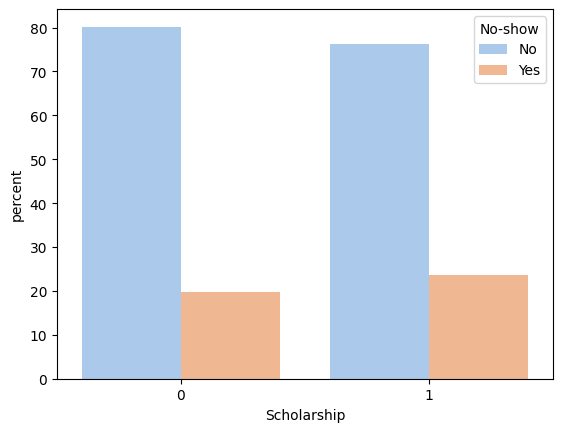

In [45]:
x,y = 'Scholarship', 'No-show'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Similarly, rates of no-shows for scholarship has almost no difference with the rate skewing slighlty higher for patients with scholarship

We can also look at the diseases to see if they have any effect on the % of No-shows regardless of any other attribute like age or gender. Just based on the disease distrbution among patients during their appointments only **7% were positive for diabetes**, **3% were alcoholics** and **2% were handicapped**. The most prevalent condition in patients was **hypertension at 20%**

(-1.099999929957982,
 1.0999999966646659,
 -1.0999998262918227,
 1.099999980156276)

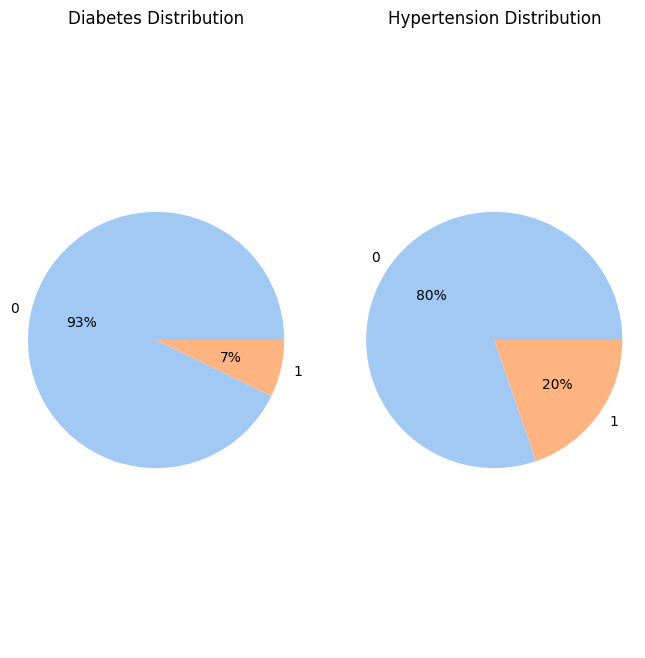

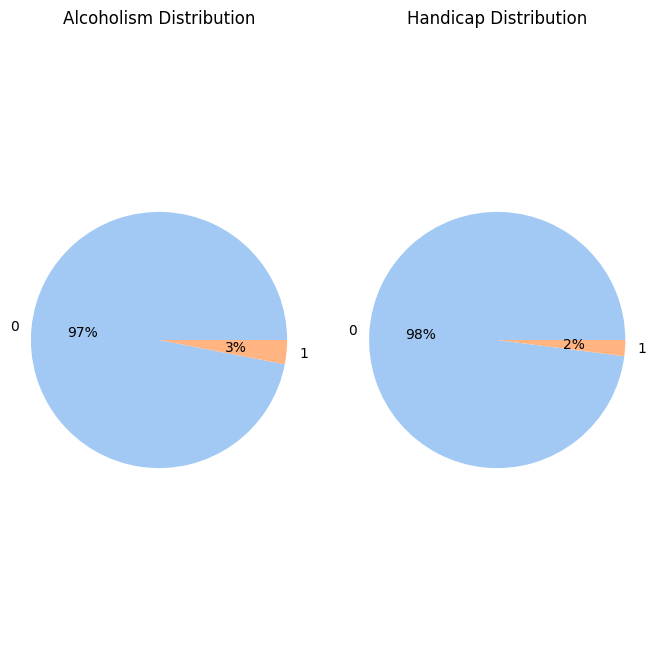

In [46]:
#get no. of appointments covered under the scheme
diab_counts = df.Diabetes.value_counts()
hiper_counts = df.Hipertension.value_counts()
alc_counts = df.Alcoholism.value_counts()
handcap_counts = df.Handcap.value_counts()

fig, (pd,ph) = plt.subplots(1,2,figsize=(8,8)) #pd, ph refer to your two pies

# Create a pie chart
pd.pie(diab_counts, labels=diab_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pd.set_title('Diabetes Distribution')
pd.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a pie chart
ph.pie(hiper_counts, labels=hiper_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
ph.set_title('Hypertension Distribution')
ph.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig, (pa,pha) = plt.subplots(1,2,figsize=(8,8)) #pa, pha refer to your two pies

# Create a pie chart
pa.pie(alc_counts, labels=alc_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pa.set_title('Alcoholism Distribution')
pa.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a pie chart
pha.pie(handcap_counts, labels=handcap_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pha.set_title('Handicap Distribution')
pha.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


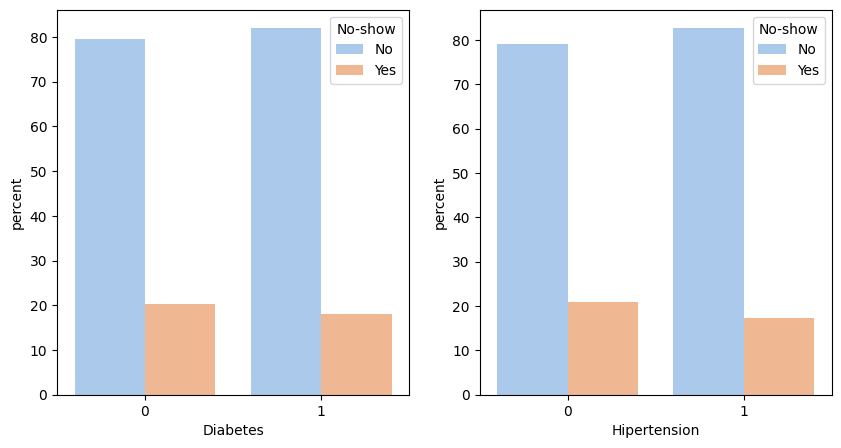

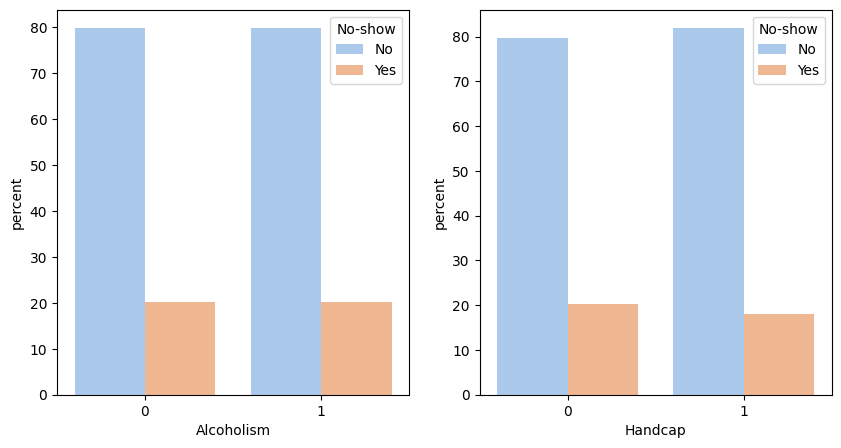

In [47]:
def plot_percent(feature, graph_reference):
    x,y = feature, 'No-show'

    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sb.barplot,'data'), x=x,y='percent', hue=y, palette=sb.color_palette("pastel"), ax=graph_reference))


fig, (pd,ph) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
plot_percent('Diabetes', pd)
plot_percent('Hipertension', ph)


fig, (pa,pha) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
plot_percent('Alcoholism', pa)
plot_percent('Handcap', pha)

As clearly seen in the graphs, having a handicap or other conditions doesn't affect the no-show rate, people with at least are almost just as likely to miss an appointment as people without a condition

## Modelling

We need to check what does the correlation between all available features
For the same we need all numeric values, hence converting ***No-show*** to numberic values (No to 0 and Yes to 1)

In [48]:
corr_data = df
corr_data['No-show']= df['No-show'].replace('No', 0)
corr_data['No-show']= df['No-show'].replace('Yes', 1)
corr_data['No-show'].value_counts()

0    88208
1    22314
Name: No-show, dtype: int64

In [49]:
#rearrange columns to keep dependent varaible i.e. No-show at the end
list(corr_data.columns.values)
corr_data = corr_data[['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDate',
 'AppointmentDate',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period',
 'No-show',
]]

In [50]:
corr_matrix = corr_data.corr()
corr_matrix['No-show']

<ipython-input-50-11bbef251844>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_data.corr()


PatientId        -0.001483
AppointmentID    -0.162624
Age              -0.060320
Scholarship       0.029167
Hipertension     -0.035660
Diabetes         -0.015156
Alcoholism       -0.000180
Handcap          -0.007527
SMS_received      0.126505
waiting_period    0.186322
No-show           1.000000
Name: No-show, dtype: float64

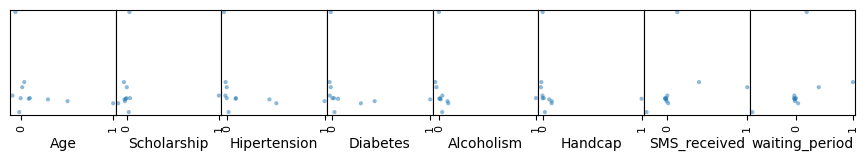

In [51]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(corr_matrix, figsize=(15, 15))

for i in range(np.shape(axes)[0] - 1):
    for j in range(np.shape(axes)[1]):
        axes[i,j].set_visible(False)

axes[10,0].set_visible(False)
axes[10,1].set_visible(False)
axes[10,10].set_visible(False)

<Axes: >

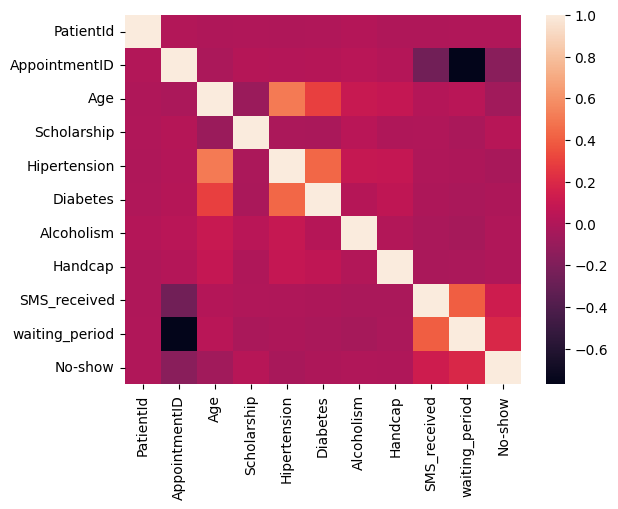

In [52]:
import seaborn as sb
sb.heatmap(corr_matrix)

# Write about why heatmap is better

In [53]:
#only select relevant columns in final feature set
final_data = df[[
 'Gender',
 'Age',
 'Neighbourhood',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period',
 'No-show',
]]

final_data.head(25)

,Gender,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,waiting_period,No-show
0,F,62.0,JARDIM DA PENHA,1,0,0,0,0,0,0
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56.0,JARDIM DA PENHA,1,1,0,0,0,0,0
5,F,76.0,REPÚBLICA,1,0,0,0,0,2,0
6,F,23.0,GOIABEIRAS,0,0,0,0,0,2,1
7,F,39.0,GOIABEIRAS,0,0,0,0,0,2,1
8,F,21.0,ANDORINHAS,0,0,0,0,0,0,0
9,F,19.0,CONQUISTA,0,0,0,0,0,2,0


In [54]:
from sklearn.preprocessing import OrdinalEncoder

y = final_data["No-show"]
X = final_data[['Gender',
 'Age',
 'Neighbourhood',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period']]

ordinal_encoder =  OrdinalEncoder(handle_unknown='error')
ordinal_encoder.fit(X)
X = ordinal_encoder.fit_transform(X)

In [55]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)

In [56]:
final_data.loc[27033, :]

Gender                        M
Age                         7.0
Neighbourhood     SÃO CRISTÓVÃO
Hipertension                  0
Diabetes                      0
Alcoholism                    0
Handcap                       0
SMS_received                  0
waiting_period                0
No-show                       0
Name: 27033, dtype: object

In [64]:
np.shape(X)

(110522, 9)

In [65]:
np.shape(y)

(110522,)

In [66]:
np.shape(X_res)

(46281, 9)

In [67]:
np.shape(y_res)

(46281,)

In [74]:
#create train-test split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import KFold

decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
random_forest = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=1)
logistic_regressor = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=10)
kf.get_n_splits(X)

for train_index,test_index in kf.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print('DT Accuracy Score: ', accuracy_score(y_test, y_pred)*100)
    print('DT F1 Score: ',f1_score(y_test, y_pred, zero_division=1)*100)
    print('DT Recall Score: ',recall_score(y_test, y_pred, zero_division=1)*100)
    print('DT Precision Score: ',precision_score(y_test, y_pred, zero_division=1)*100)

    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    print('RF Accuracy Score: ', accuracy_score(y_test, y_pred_rf)*100)
    print('RF F1 Score: ',f1_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Recall Score: ',recall_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Precision Score: ',precision_score(y_test, y_pred_rf, zero_division=1)*100)


    logistic_regressor.fit(X_train,y_train)
    y_pred_lr = logistic_regressor.predict(X_test)
    print('LR Accuracy Score: ', accuracy_score(y_test, y_pred_lr)*100)
    print('LR F1 Score: ',f1_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Recall Score: ',recall_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Precision Score: ',precision_score(y_test, y_pred_lr, zero_division=1)*100)


Train Index:  [ 11053  11054  11055 ... 110519 110520 110521] 

Test Index:  [    0     1     2 ... 11050 11051 11052]
DT Accuracy Score:  79.73400886637111
DT F1 Score:  0.26714158504007124
DT Recall Score:  0.13416815742397137
DT Precision Score:  30.0
RF Accuracy Score:  79.7701981362526
RF F1 Score:  0.0
RF Recall Score:  0.0
RF Precision Score:  100.0
LR Accuracy Score:  79.50782592961187
LR F1 Score:  2.075226977950713
LR Recall Score:  1.073345259391771
LR Precision Score:  31.16883116883117
Train Index:  [     0      1      2 ... 110519 110520 110521] 

Test Index:  [11053 11054 11055 ... 22103 22104 22105]
DT Accuracy Score:  80.33113181941555
DT F1 Score:  1.4505893019038987
DT Recall Score:  0.7366482504604052
DT Precision Score:  47.05882352941176
RF Accuracy Score:  80.34922645435628
RF F1 Score:  0.0
RF Recall Score:  0.0
RF Precision Score:  100.0
LR Accuracy Score:  80.30398986700443
LR F1 Score:  0.729594163246694
LR Recall Score:  0.3683241252302026
LR Precision Score

In [75]:
#create train-test split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import KFold

decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
random_forest = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=1)
logistic_regressor = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=10)
kf.get_n_splits(X_res)

for train_index,test_index in kf.split(X_res):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_res[train_index], X_res[test_index], y_res[train_index], y_res[test_index]

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print('DT Accuracy Score: ', accuracy_score(y_test, y_pred)*100)
    print('DT F1 Score: ',f1_score(y_test, y_pred, zero_division=1)*100)
    print('DT Recall Score: ',recall_score(y_test, y_pred, zero_division=1)*100)
    print('DT Precision Score: ',precision_score(y_test, y_pred, zero_division=1)*100)

    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    print('RF Accuracy Score: ', accuracy_score(y_test, y_pred_rf)*100)
    print('RF F1 Score: ',f1_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Recall Score: ',recall_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Precision Score: ',precision_score(y_test, y_pred_rf, zero_division=1)*100)

    logistic_regressor.fit(X_train,y_train)
    y_pred_lr = logistic_regressor.predict(X_test)
    print('LR Accuracy Score: ', accuracy_score(y_test, y_pred_lr)*100)
    print('LR F1 Score: ',f1_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Recall Score: ',recall_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Precision Score: ',precision_score(y_test, y_pred_lr, zero_division=1)*100)


Train Index:  [ 4629  4630  4631 ... 46278 46279 46280] 

Test Index:  [   0    1    2 ... 4626 4627 4628]
DT Accuracy Score:  94.90170663210196
DT F1 Score:  0.0
DT Recall Score:  100.0
DT Precision Score:  0.0
RF Accuracy Score:  94.55605962410888
RF F1 Score:  0.0
RF Recall Score:  100.0
RF Precision Score:  0.0
LR Accuracy Score:  98.01252970403975
LR F1 Score:  0.0
LR Recall Score:  100.0
LR Precision Score:  0.0
Train Index:  [    0     1     2 ... 46278 46279 46280] 

Test Index:  [4629 4630 4631 ... 9254 9255 9256]
DT Accuracy Score:  95.24632670700086
DT F1 Score:  0.0
DT Recall Score:  100.0
DT Precision Score:  0.0
RF Accuracy Score:  96.00259291270528
RF F1 Score:  0.0
RF Recall Score:  100.0
RF Precision Score:  0.0
LR Accuracy Score:  97.8608470181504
LR F1 Score:  0.0
LR Recall Score:  100.0
LR Precision Score:  0.0
Train Index:  [    0     1     2 ... 46278 46279 46280] 

Test Index:  [ 9257  9258  9259 ... 13882 13883 13884]
DT Accuracy Score:  94.1875540190147
DT F1 S

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)

In [ ]:
np.unique(y_pred)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100)
print('F1 Score: ',f1_score(y_test, y_pred)*100)
print('Recall Score: ',recall_score(y_test, y_pred)*100)
print('Precision Score: ',precision_score(y_test, y_pred)*100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [ ]:
np.unique(y_pred_rf)

In [ ]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred_rf)*100)
print('F1 Score: ',f1_score(y_test, y_pred_rf)*100)
print('Recall Score: ',recall_score(y_test, y_pred_rf)*100)
print('Precision Score: ',precision_score(y_test, y_pred_rf)*100)

<br><br>

**Q3: Suppose the distribution of length of stay of patients in a hospital is given by the graph below. You are given the task to predict the length of stay. How would you change the problem from a regression problem to a binary classification problem?**

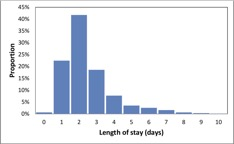